<div style="font-size:30px; text-align:center; font-weight:bold;">
    Projekat 1 - Opossum
</div>

Student: Vedran Mitić 2123


---------------------------

# Sadržaj
1. [UVOZ SKUPA PODATAKA I DESKRIPTIVNA ANALIZA](#1.-UVOZ-SKUPA-PODATAKA-I-DESKRIPTIVNA-ANALIZA)
2. [UNOS NEDOSTAJUĆIH PODATAKA](#2.-UNOS-NEDOSTAJUĆIH-PODATAKA)
3. [KLASIFIKACIJA POLA](#3.-KLASIFIKACIJA-POLA)
4. [KLASIFIKACIJA GEOGRAFSKE REGIJE](#4.-KLASIFIKACIJA-GEOGRAFSKE-REGIJE)
5. [PREDVIĐANJE GODINA](#5.-PREDVIĐANJE-GODINA)
6. [ZAKLJUČAK](#6.-ZAKLJUČAK)


-------------------------

# 1. UVOZ SKUPA PODATAKA I DESKRIPTIVNA ANALIZA


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import shap


In [2]:
file = 'possum.csv'

complete_set = pd.read_csv(file)

complete_set


case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  15.2   28.0   36.0  
1        51.2  16.0   28.5   33.0  
2        51.9  15.5   30.0   34.0  
3        52.2  15.2   28.0   34.0  
4        53.2  15.1   28.5   33.0  
..        ...   ...    ...    ...  
99       46.8  14.8   23.0   27.0  
100      48.0  14.0   25.0   33.0  
101      45.4  13.0   25.0   30.0  
102      45.9  15.4   25.0   29.0  
103      46.0  14.8   28.5   33.5  

[104 rows x 14 columns]

--------------------

Skup podataka se sastoji od **104** uzoraka i **14** karakteristika.<br>
Karakteristike su:<br>
**case** - index uzorka (može se obrisati)<br>
**site** - lokacija gde je posum uhvaćen<br>
**Pop** - populacija kojoj pripada oposum<br>
**sex** - pol<br>
**age** - godine<br>
**hdlngth** - dužina glave u mm<br>
**skullw** - širina lobanje u mm<br>
**totlngth** - totalna dužina (dužina tela) u cm<br>
**taill** - dužina repa u cm<br>
**footlgth** - dužina stopala u mm<br>
**earconch** - dužina usne školjke u mm<br>
**eye** - rastojanje od medijalnog kantusa to lateralnog kantusa desnog oka u mm<br>
**chest** - obim grudi u cm<br>
**belly** - obim stomaka u cm<br>

In [3]:
complete_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


---------

Vidi se da samo dve kolone imaju tip podatka *object* - **Pop** i **sex**, što je dobro za dalji rad kada bude potrebno da se ove vrednosti enkodiraju.

In [4]:
print(complete_set["Pop"].unique())
print(complete_set["sex"].unique())

#alternativno:
#print(complete_set["Pop"].nunique())
#print(complete_set["sex"].nunique())
#ovo bi bilo zgodno ukoliko postoji znacajno veci broj mogucih vrednosti koje nam je tesko da vizuelno prebrojimo

['Vic' 'other']
['m' 'f']


Obe kolone imaju samo dve moguće vrednosti, što je zgodno jer će se predstavljati vrednostima **0** i **1**.<br>
Vrednost ***Vic*** znači da je lokacija *Victoria*, a ***other*** da je *South Wales* ili *Queensland*.

---------------------------------------------------------------------------------------------------------------------
Kako kolona site predstavlja prosto indeksiranje uzoraka, a pandas već pruža isto, ovu kolonu možemo izbaciti iz tabele.

In [5]:
complete_set = complete_set.drop(["case"],axis=1)
#ukoliko se ova celija ponovo pokrene javice se greska jer kolona "case" vise ne postoji

In [6]:
complete_set.head()

site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
0     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5      54.5   
1     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5      51.2   
2     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4      51.9   
3     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1      52.2   
4     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0      53.2   

    eye  chest  belly  
0  15.2   28.0   36.0  
1  16.0   28.5   33.0  
2  15.5   30.0   34.0  
3  15.2   28.0   34.0  
4  15.1   28.5   33.0

*Case* kolona je izbrisana i broj kolona se smanjio na **13**

In [7]:
complete_set.describe()


site         age     hdlngth      skullw    totlngth       taill  \
count  104.000000  102.000000  104.000000  104.000000  104.000000  104.000000   
mean     3.625000    3.833333   92.602885   56.883654   87.088462   37.009615   
std      2.349086    1.909244    3.573349    3.113426    4.310549    1.959518   
min      1.000000    1.000000   82.500000   50.000000   75.000000   32.000000   
25%      1.000000    2.250000   90.675000   54.975000   84.000000   35.875000   
50%      3.000000    3.000000   92.800000   56.350000   88.000000   37.000000   
75%      6.000000    5.000000   94.725000   58.100000   90.000000   38.000000   
max      7.000000    9.000000  103.100000   68.600000   96.500000   43.000000   

         footlgth    earconch         eye       chest       belly  
count  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    68.459223   48.130769   15.046154   27.000000   32.586538  
std      4.395306    4.109380    1.050374    2.045597    2.761949  
min     60.300000   40.300000   12.800000   22.000000   25.000000  
25%     64.600000   44.800000   14.400000   25.500000   31.000000  
50%     68.000000   46.800000   14.900000   27.000000   32.500000  
75%     72.500000   52.000000   15.725000   28.000000   34.125000  
max     77.900000   56.200000   17.800000   32.000000   40.000000

Iz prvog reda koji prikazuje broj vrednosti svake karakteristike može se videti da za kolone **age** i **footlgth** postoje **dve**, odnosno **jedna** Nan vrednost. To će se rešiti kasnije.<br>
Evo raspodele pojedinih kolona, recimo **site**, **age**, **Pop** i **sex**:<br>



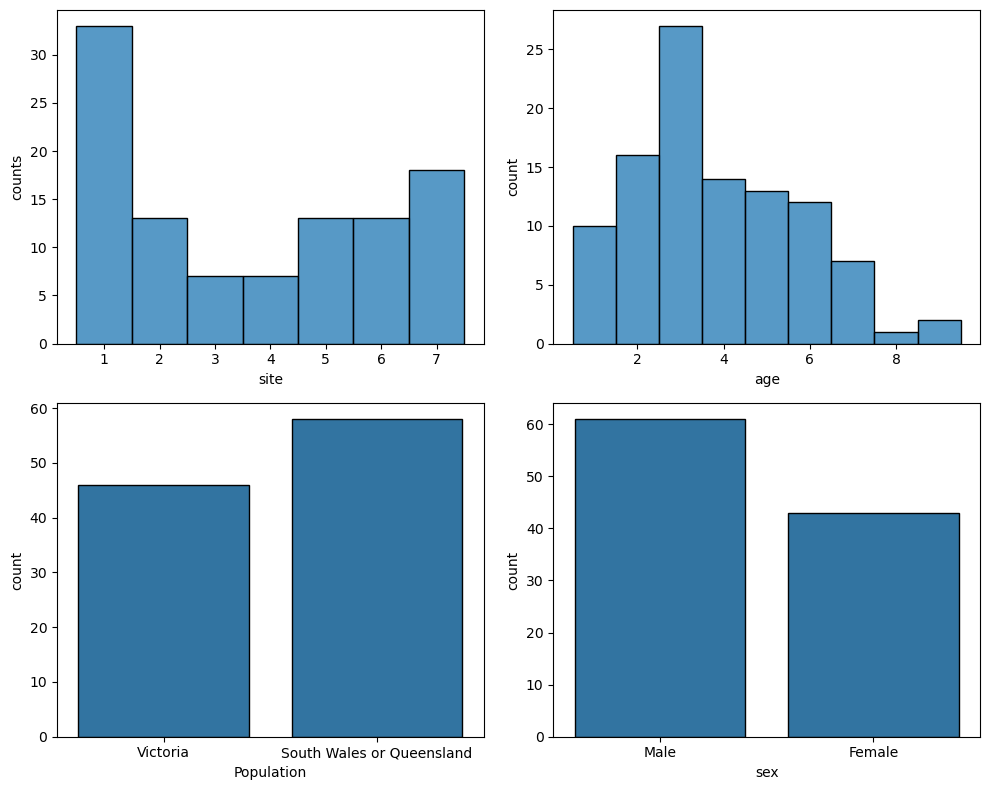

site
1    33
7    18
2    13
5    13
6    13
3     7
4     7
Name: count, dtype: int64


age
3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64


Pop
other    58
Vic      46
Name: count, dtype: int64


sex
m    61
f    43
Name: count, dtype: int64


In [8]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
sns.histplot(x='site', data = complete_set, discrete = True)
plt.xlabel("site")
plt.ylabel("counts")

plt.subplot(2,2,2)
sns.histplot(x = 'age', data = complete_set, discrete = True)
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(2,2,3)
sns.countplot(x = complete_set["Pop"].map({"Vic":"Victoria","other":"South Wales or Queensland"}),data = complete_set, edgecolor = 'black')
plt.xlabel('Population')
plt.ylabel('count')

plt.subplot(2,2,4)
sns.countplot(x=complete_set["sex"].map({"m":"Male","f":"Female"}), data = complete_set, edgecolor = 'black')
plt.xlabel('sex')
plt.ylabel('count')

plt.tight_layout()
plt.show()


print(complete_set['site'].value_counts())
print('\n')
print(complete_set['age'].value_counts())
print('\n')
print(complete_set['Pop'].value_counts())
print('\n')
print(complete_set['sex'].value_counts())



Iz priloženih grafika može se videti sledeće:<br>
1. *Site* grafik
- Ubedljivo najveći broj oposuma je uhvaćen na lokaciji **1**.
- Ostali oposumi su otprilike podjednako hvatani na preostalim lokacijama tako da je na lokacijama **3** i **4** i **2**,**5** i **6** uhvacen podjednak broj.
- Poređenjem sa tabelom *.describe()*, vidimo da je veliki broj jedinica razlog zašto su vrednosti *min* i *25-ti kvartil* jednake.


2. *Age* grafik
- Najveći broj oposuma ima **3** godine starosti i podjednako je distribuiran među ostalim uzrastima, uz svega tri uzorka od **8** i **9** godina. Treba uzeti u obzir i da ovoj karakteristici fale dva uzorka.

3. *Population* grafik
- Oposumi su skoro podjednako distribuirani u obe klase. Klasa **Victoria** sadrži manje oposuma verovatno zato što druga klasa predstvlja skup dveju geografskih oblasti.

4. *Sex* grafik
- Oposumi su skoro podjednako distribuirani u obe klase.

Pošto *age* i  *footlgth* imaju nedostajuće vrednosti, potrebno je videti koji su to uzorci:

In [9]:
x = complete_set[complete_set['age'].isnull()]
x


site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
43     2  Vic   m  NaN     85.1    51.5      76.0   35.5      70.3      52.6   
45     2  Vic   m  NaN     91.4    54.4      84.0   35.0      72.8      51.2   

     eye  chest  belly  
43  14.4   23.0   27.0  
45  14.4   24.5   35.0

In [10]:
y = complete_set[complete_set['footlgth'].isnull()]
y

site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
40     2  Vic   f  5.0     88.4    57.0      83.0   36.5       NaN      40.3   

     eye  chest  belly  
40  15.9   27.0   30.5

Vidi se da su zajedničke karakteristike ovih uzoraka **site = 2** i **Pop = Vic**.<br>
Možda se ovi uzorci mogu izvući kao test uzorci za kasnije.


--------------------------------------------------------------------------------------------------------------------

In [11]:
complete_set.groupby(['sex'])[['age']].mean()


age
sex          
f    3.976744
m    3.728814

In [12]:
complete_set.groupby('sex')[['age']].median()

age
sex     
f    4.0
m    3.0

Prosek godina muških i ženskih oposuma je gotovo identican, malo veći prosek kod ženki je verovatno uslovljen outlierom ***9***. Kod ženka polovina uzoraka je mladje od **4** godina, dok je kod muških mlađe od **3**. 

In [13]:
complete_set.groupby(['sex'])['site'].apply(lambda x: x.mode()[0]).reset_index(name='most_common_site')

sex  most_common_site
0   f                 1
1   m                 1

I ženski i muški oposumi najčešće su ulovljeni na lokaciji **1**.

In [14]:
complete_set.groupby('sex')['site'].apply(lambda x:x.value_counts().iloc[0:3]).reset_index(name='most_common_site_counts').rename(columns = {'level_1':'site_number'})

sex  site_number  most_common_site_counts
0   f            1                       19
1   f            5                        6
2   f            2                        5
3   m            1                       14
4   m            7                       14
5   m            6                        9

Međutim vidimo da su muški oposumi zapravo isto tako često ulovljeni i na lokaciji **7**.

Grafički prikazi:

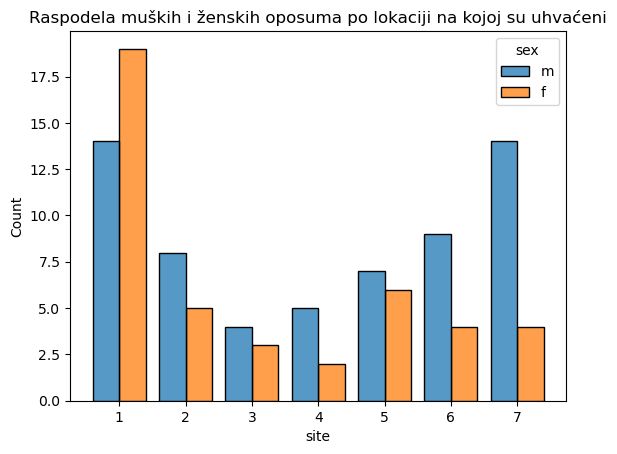

In [15]:
sns.histplot(data = complete_set, x = 'site', hue = 'sex', discrete = True, multiple = 'dodge', shrink = 0.8)
plt.title('Raspodela muških i ženskih oposuma po lokaciji na kojoj su uhvaćeni')
plt.show()

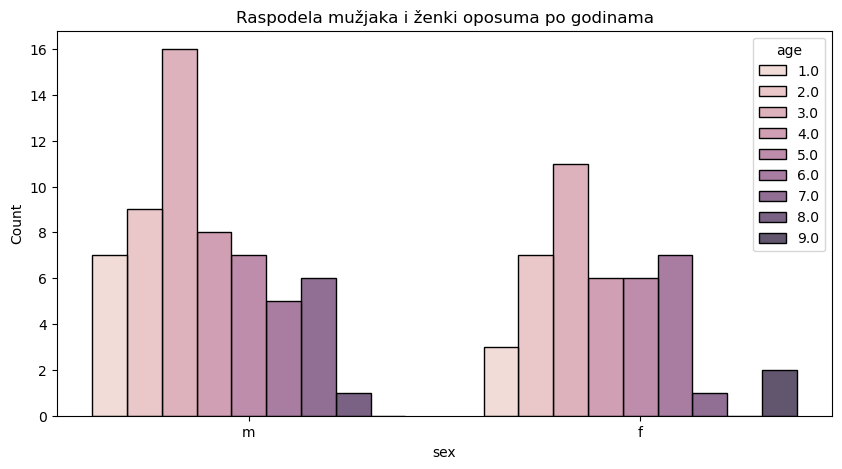

In [16]:
plt.figure(figsize = (10,5))
sns.histplot(data = complete_set, x = 'sex', hue = 'age', shrink = 0.8, discrete = True, multiple = 'dodge')
plt.title('Raspodela mužjaka i ženki oposuma po godinama')
plt.show()



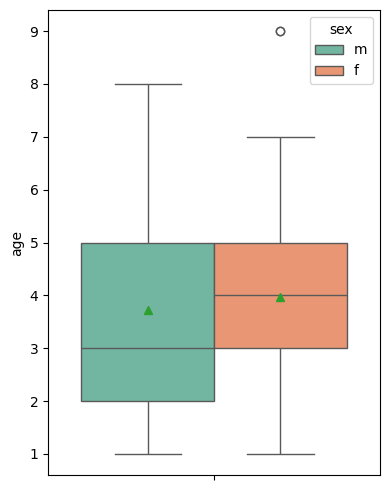

In [17]:
plt.figure(figsize = (4,5))
sns.boxplot(data = complete_set, hue = 'sex', y = 'age', palette = 'Set2', showmeans = True)

plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------

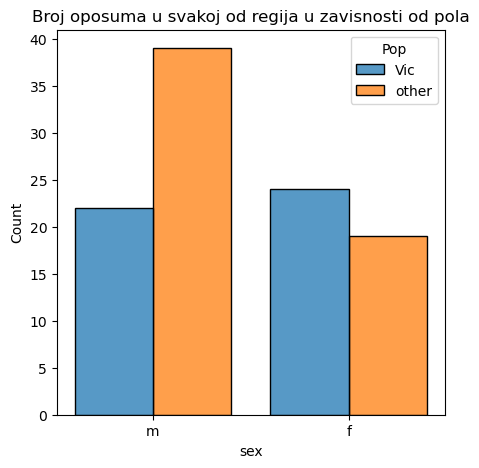

sex       
f    Vic      24
     other    19
m    other    39
     Vic      22
Name: Pop, dtype: int64

In [18]:
plt.figure(figsize = (5,5))
sns.histplot(data = complete_set, x = 'sex', hue = 'Pop', multiple = 'dodge', shrink = 0.8)
plt.title('Broj oposuma u svakoj od regija u zavisnosti od pola')
plt.show()
complete_set.groupby('sex')['Pop'].apply(lambda x: x.value_counts())

In [19]:
complete_set.groupby('Pop')['site'].apply(lambda x: x.value_counts())

Pop     
Vic    1    33
       2    13
other  7    18
       5    13
       6    13
       3     7
       4     7
Name: site, dtype: int64

Iz izlaza gorenje ćelije dobio sam upravo ono što sam i želeo, a to je da vidim koje lokacije (*sites*) pripadaju kojim regionima (*Population*). Vidi se da region ***Victoria*** ima samo dve lokacije, što je i normalno jer ***other*** predstavlja skup dva regiona.

------------------------------------------------------------------------------------------------------------------

In [20]:

modified_set = complete_set.drop(['age','Pop','site'], axis=1)
modified_set = modified_set.rename(columns={'hdlngth':'hdlngth[mm]' ,'skullw':'skullw[mm]','totlngth':'totlngth[cm]','taill':'taill[cm]','footlgth':'footlgth[mm]','earconch':'earconch[mm]','eye':'eye[mm]','chest':'chest[cm]','belly':'belly[cm]'})
modified_set_data = modified_set.groupby('sex').describe()
modified_set_data = modified_set_data.drop(['count','std','50%','25%','75%'], axis = 1, level = 1) #levelom pristupamo kolonama koje nam daje .describe()

#ovo sam morao kako mi se ne bi prikazivale ... zbog velikog broja kolona i redova:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect display width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines
modified_set_data

hdlngth[mm]              skullw[mm]             totlngth[cm]              taill[cm]             footlgth[mm]             earconch[mm]                eye[mm]              chest[cm]              belly[cm]            
           mean   min    max       mean   min   max         mean   min   max       mean   min   max         mean   min   max         mean   min   max       mean   min   max       mean   min   max       mean   min   max
sex                                                                                                                                                                                                                       
f     92.148837  84.7   96.9  56.588372  51.5  67.7    87.906977  75.0  96.5  37.104651  32.0  41.0    69.111905  60.3  77.9    48.576744  40.3  53.9  14.811628  13.0  17.4  27.337209  23.0  31.0  32.883721  25.0  40.0
m     92.922951  82.5  103.1  57.091803  50.0  68.6    86.511475  76.0  96.0  36.942623  32.0  43.0    68.009836  62.0  75.0    47.816393  41.7  56.2  15.211475  12.8  17.8  26.762295  22.0  32.0  32.377049  27.0  38.0

In [21]:
modified_set.groupby('sex').median()

hdlngth[mm]  skullw[mm]  totlngth[cm]  taill[cm]  footlgth[mm]  earconch[mm]  eye[mm]  chest[cm]  belly[cm]
sex                                                                                                             
f           92.5        56.4          88.5       37.5         70.45          50.8     14.8       28.0       33.0
m           93.2        56.3          86.0       36.5         66.90          46.4     15.0       27.0       32.0

Inicijalno sam mislio da pronađem da li postoji neka fizička razlika između ženke i mužjaka ove životinje, ali svi dostupni podaci pokazuju da ne postoji neke značajne razlike u dimenzijama.<br>

Da li postoji razlika u vrsti oposuma, odnosno iz koje regije dolazi?

In [22]:

modified_set = complete_set.drop(['age','sex','site'], axis=1)
modified_set = modified_set.rename(columns={'hdlngth':'hdlngth[mm]' ,'skullw':'skullw[mm]','totlngth':'totlngth[cm]','taill':'taill[cm]','footlgth':'footlgth[mm]','earconch':'earconch[mm]','eye':'eye[mm]','chest':'chest[cm]','belly':'belly[cm]'})
modified_set_data = modified_set.groupby('Pop').describe()
modified_set_data = modified_set_data.drop(['count','std','50%','25%','75%'], axis = 1, level = 1) #levelom pristupamo kolonama koje nam daje .describe()

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.expand_frame_repr', False)
modified_set_data

hdlngth[mm]              skullw[mm]             totlngth[cm]              taill[cm]             footlgth[mm]             earconch[mm]                eye[mm]              chest[cm]              belly[cm]            
             mean   min    max       mean   min   max         mean   min   max       mean   min   max         mean   min   max         mean   min   max       mean   min   max       mean   min   max       mean   min   max
Pop                                                                                                                                                                                                                         
Vic     92.597826  84.7   96.3  56.654348  51.5  67.7    87.467391  75.0  96.5  35.934783  32.0  39.5    72.397778  62.7  77.9    52.186957  40.3  56.2  14.871739  13.0  16.4  27.445652  23.0  31.0  32.663043  25.0  40.0
other   92.606897  82.5  103.1  57.065517  50.0  68.6    86.787931  80.5  96.0  37.862069  34.0  43.0    65.403448  60.3  73.2    44.913793  41.3  48.0  15.184483  12.8  17.8  26.646552  22.0  32.0  32.525862  27.0  39.0

In [23]:
modified_set.groupby('Pop').median()

hdlngth[mm]  skullw[mm]  totlngth[cm]  taill[cm]  footlgth[mm]  earconch[mm]  eye[mm]  chest[cm]  belly[cm]
Pop                                                                                                               
Vic          93.15        56.3          89.0       36.0          72.8         52.15     14.9       28.0       32.5
other        92.40        56.4          86.5       38.0          65.2         44.90     15.0       26.0       32.5

I ovde su podaci izbalansirani. Probaću da ih još više rasparčam.

In [24]:

modified_set = complete_set.drop(['age','site'], axis=1)
modified_set = modified_set.rename(columns={'hdlngth':'hdlngth[mm]' ,'skullw':'skullw[mm]','totlngth':'totlngth[cm]','taill':'taill[cm]','footlgth':'footlgth[mm]','earconch':'earconch[mm]','eye':'eye[mm]','chest':'chest[cm]','belly':'belly[cm]'})
modified_set_data = modified_set.groupby(['sex','Pop']).describe()
modified_set_data = modified_set_data.drop(['count','std','50%','25%','75%'], axis = 1, level = 1) #levelom pristupamo kolonama koje nam daje .describe()

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.expand_frame_repr', False)  
modified_set_data

hdlngth[mm]              skullw[mm]             totlngth[cm]              taill[cm]             footlgth[mm]             earconch[mm]                eye[mm]              chest[cm]              belly[cm]            
                 mean   min    max       mean   min   max         mean   min   max       mean   min   max         mean   min   max         mean   min   max       mean   min   max       mean   min   max       mean   min   max
sex Pop                                                                                                                                                                                                                         
f   Vic     92.412500  84.7   95.9  56.645833  51.5  67.7    88.333333  75.0  96.5  36.333333  32.0  39.5    73.021739  68.7  77.9    51.758333  40.3  53.9  14.695833  13.0  16.0  27.750000  23.0  31.0  32.541667  25.0  40.0
    other   91.815789  86.0   96.9  56.515789  52.0  59.9    87.368421  81.5  93.0  38.078947  36.0  41.0    64.378947  60.3  68.2    44.557895  41.3  47.2  14.957895  13.0  17.4  26.815789  25.0  31.0  33.315789  28.5  39.0
m   Vic     92.800000  85.1   96.3  56.663636  51.5  60.4    86.522727  76.0  93.0  35.500000  32.0  39.5    71.745455  62.7  75.0    52.654545  49.5  56.2  15.063636  13.8  16.4  27.113636  23.0  31.0  32.795455  27.0  38.0
    other   92.992308  82.5  103.1  57.333333  50.0  68.6    86.505128  80.5  96.0  37.756410  34.0  43.0    65.902564  62.0  73.2    45.087179  41.7  48.0  15.294872  12.8  17.8  26.564103  22.0  32.0  32.141026  27.0  36.5

In [25]:
modified_set.groupby(['sex','Pop']).median()

hdlngth[mm]  skullw[mm]  totlngth[cm]  taill[cm]  footlgth[mm]  earconch[mm]  eye[mm]  chest[cm]  belly[cm]
sex Pop                                                                                                               
f   Vic          92.95        56.3          89.5      36.25         72.80          52.1    14.80       28.0       33.0
    other        91.90        56.4          88.0      38.00         64.10          44.2    14.80       26.0       33.5
m   Vic          93.40        56.4          87.5      35.50         72.55          52.3    14.95       27.0       32.0
    other        92.80        56.3          85.0      38.00         65.60          44.9    15.00       26.0       32.0

Spojicu sve podatke zajedno:

In [26]:
median_data = modified_set.groupby(['sex','Pop']).median()
median_data.columns = pd.MultiIndex.from_product([median_data.columns,['median']])

#modified_set_merged = pd.concat([modified_set_data, median_data], axis=1) -- Laksa alternativa
modified_set_merged = pd.merge(modified_set_data, median_data, left_index = True, right_index=True)
modified_set_merged = modified_set_merged.sort_index(axis=1)
modified_set_merged

belly[cm]                         chest[cm]                         earconch[mm]                         eye[mm]                         footlgth[mm]                         hdlngth[mm]                         skullw[mm]                         taill[cm]                         totlngth[cm]                        
                max       mean median   min       max       mean median   min          max       mean median   min     max       mean median   min          max       mean median   min         max       mean median   min        max       mean median   min       max       mean median   min          max       mean median   min
sex Pop                                                                                                                                                                                                                                                                                                                              
f   Vic        40.0  32.541667   33.0  25.0      31.0  27.750000   28.0  23.0         53.9  51.758333   52.1  40.3    16.0  14.695833  14.80  13.0         77.9  73.021739  72.80  68.7        95.9  92.412500  92.95  84.7       67.7  56.645833   56.3  51.5      39.5  36.333333  36.25  32.0         96.5  88.333333   89.5  75.0
    other      39.0  33.315789   33.5  28.5      31.0  26.815789   26.0  25.0         47.2  44.557895   44.2  41.3    17.4  14.957895  14.80  13.0         68.2  64.378947  64.10  60.3        96.9  91.815789  91.90  86.0       59.9  56.515789   56.4  52.0      41.0  38.078947  38.00  36.0         93.0  87.368421   88.0  81.5
m   Vic        38.0  32.795455   32.0  27.0      31.0  27.113636   27.0  23.0         56.2  52.654545   52.3  49.5    16.4  15.063636  14.95  13.8         75.0  71.745455  72.55  62.7        96.3  92.800000  93.40  85.1       60.4  56.663636   56.4  51.5      39.5  35.500000  35.50  32.0         93.0  86.522727   87.5  76.0
    other      36.5  32.141026   32.0  27.0      32.0  26.564103   26.0  22.0         48.0  45.087179   44.9  41.7    17.8  15.294872  15.00  12.8         73.2  65.902564  65.60  62.0       103.1  92.992308  92.80  82.5       68.6  57.333333   56.3  50.0      43.0  37.756410  38.00  34.0         96.0  86.505128   85.0  80.5

*Napomena: Očigledno je da u ovom delu, na početku rada, nisam lepo obratio pažnju i uočio razlike koje postoje u zavisnosti od geografske lokacije. Vidi se, što će i na testiranju algoritama biti pokazano, da postoje razlike u karakteristikama **earconch**, **footlgth** i **taill**.*

---------------------------

# 2. UNOS NEDOSTAJUĆIH PODATAKA


Enkodiranje kolona koje sadrže nominalne vrednosti jednostavno pomoću OHE.

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_set = ohe.fit_transform(complete_set[['sex','Pop']])
feature_names = ohe.get_feature_names_out(['sex','Pop'])#kako zna da se obracam sex i Pop kolonama u complete_set?

ohe_Dataframe = pd.DataFrame(ohe_set, columns = feature_names, index = complete_set.index)

complete_set_numeric = complete_set.drop(['sex','Pop'], axis = 1)
complete_set2 = pd.concat([complete_set_numeric,ohe_Dataframe], axis = 1)
complete_set2.head() #ovo ce biti sada novi dataset koji ce se koristiti


site  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  belly  sex_f  sex_m  Pop_Vic  Pop_other
0     1  8.0     94.1    60.4      89.0   36.0      74.5      54.5  15.2   28.0   36.0    0.0    1.0      1.0        0.0
1     1  6.0     92.5    57.6      91.5   36.5      72.5      51.2  16.0   28.5   33.0    1.0    0.0      1.0        0.0
2     1  6.0     94.0    60.0      95.5   39.0      75.4      51.9  15.5   30.0   34.0    1.0    0.0      1.0        0.0
3     1  6.0     93.2    57.1      92.0   38.0      76.1      52.2  15.2   28.0   34.0    1.0    0.0      1.0        0.0
4     1  2.0     91.5    56.3      85.5   36.0      71.0      53.2  15.1   28.5   33.0    1.0    0.0      1.0        0.0

Rešavanje ***nan*** vrednosti u tabeli. 

In [28]:
print(complete_set.groupby(['sex','Pop'])['age'].mean())
print(complete_set.groupby(['sex','Pop'])['age'].median())

sex  Pop  
f    Vic      4.041667
     other    3.894737
m    Vic      4.000000
     other    3.589744
Name: age, dtype: float64
sex  Pop  
f    Vic      4.0
     other    3.0
m    Vic      3.0
     other    3.0
Name: age, dtype: float64


## 2.1. Prva (lična) verzija inputting-a

In [29]:
'''
def add_age(sex, pop):
    if (sex == 'f' and pop == 'Vic'):
        age = 4.0
    else:
        age = 3.0
    return age

nan_set = complete_set[complete_set['age'].isnull()]

for i in nan_set.itertuples():
    idx = i.Index
    sex = i.sex
    pop = i.Pop
    age = i.age
    new_age = add_age(sex, pop)
    complete_set.at[idx,'age'] = new_age
'''
#laksa alternativa
#complete_set['age'] = complete_set['age'].fillna(complete_set.groupby(['sex','Pop'])['age'].transform('median'))




"\ndef add_age(sex, pop):\n    if (sex == 'f' and pop == 'Vic'):\n        age = 4.0\n    else:\n        age = 3.0\n    return age\n\nnan_set = complete_set[complete_set['age'].isnull()]\n\nfor i in nan_set.itertuples():\n    idx = i.Index\n    sex = i.sex\n    pop = i.Pop\n    age = i.age\n    new_age = add_age(sex, pop)\n    complete_set.at[idx,'age'] = new_age\n"

## 2.2. KNN verzija:


In [30]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_set = scaler.fit_transform(complete_set2)

imputer = KNNImputer(n_neighbors=10)

scaled_set_imputed = imputer.fit_transform(scaled_set)
scaled_set_imputed = scaler.inverse_transform(scaled_set_imputed)
scaled_set_imputed = pd.DataFrame(scaled_set_imputed)

imputed_set = imputer.fit_transform(complete_set2)
imputed_set = pd.DataFrame(imputed_set)


print(scaled_set_imputed.iloc[[40,43,45]])
print(imputed_set.iloc[[40,43,45]])

broj = scaled_set_imputed.iloc[43][1]
broj

     0    1     2     3     4     5      6     7     8     9     10   11   12   13   14
40  2.0  5.0  88.4  57.0  83.0  36.5  68.08  40.3  15.9  27.0  30.5  1.0  0.0  1.0  0.0
43  2.0  2.7  85.1  51.5  76.0  35.5  70.30  52.6  14.4  23.0  27.0  0.0  1.0  1.0  0.0
45  2.0  3.9  91.4  54.4  84.0  35.0  72.80  51.2  14.4  24.5  35.0  0.0  1.0  1.0  0.0
     0    1     2     3     4     5      6     7     8     9     10   11   12   13   14
40  2.0  5.0  88.4  57.0  83.0  36.5  63.07  40.3  15.9  27.0  30.5  1.0  0.0  1.0  0.0
43  2.0  2.5  85.1  51.5  76.0  35.5  70.30  52.6  14.4  23.0  27.0  0.0  1.0  1.0  0.0
45  2.0  3.3  91.4  54.4  84.0  35.0  72.80  51.2  14.4  24.5  35.0  0.0  1.0  1.0  0.0


np.float64(2.6999999999999997)

<div style = "font-size:18px;">
    Poredio sam rezultate dobijene sa i bez prethodnog skaliranja:<br>
    - Red <b>40</b> je sadržao nan vrednost za kolonu footlgth koja je iznad pod indexom <b>6</b>: sa skaliranjem (prva tabela) je vrednost <b>68.08</b> sto je za dobrih <b>5mm</b> veća vrednost, a ujedno i bliža prosečnoj vrednosti.<br>
    - Redovi <b>43</b> i <b>45</b> su sadržali nan vrednosti za kolonu age koja je pod indexom <b>1</b>: ukoliko se koristi standardno matematičko zaokruživanje (gde bi uzorak <b>43</b> sa <b>2.5</b> godine dobio vrednost <b>3</b>), vidi se razlika u rezultatima gde bi uzorak <b>45</b> dobio vrednost <b>4</b> (3.9) sa skaliranjem, dok bi bez skaliranja dobio <b>3</b> (3.3).<br>
    Kako skaliranjem KNN daje na značaju svim karakteristikama, uzeću skalirane vrednosti u obzir. 
</div>

In [31]:
indexs_age = complete_set2[complete_set2['age'].isnull()].index.tolist() #index reda
index_Age = complete_set2.columns.get_loc('age') #index kolone

indexs_lng = complete_set2[complete_set2['footlgth'].isnull()].index.tolist() #index reda
index_Lng = complete_set2.columns.get_loc('footlgth') #index kolone


age_Values = scaled_set_imputed.iloc[indexs_age][index_Age].round().tolist()
lng_Values = scaled_set_imputed.iloc[indexs_lng][index_Lng].tolist()
print(age_Values)
print(lng_Values)

complete_set2.loc[indexs_age,'age'] = age_Values
complete_set2.loc[indexs_lng,'footlgth'] = lng_Values

complete_set2.iloc[[40,43,45]]

[3.0, 4.0]
[68.08]


site  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  belly  sex_f  sex_m  Pop_Vic  Pop_other
40     2  5.0     88.4    57.0      83.0   36.5     68.08      40.3  15.9   27.0   30.5    1.0    0.0      1.0        0.0
43     2  3.0     85.1    51.5      76.0   35.5     70.30      52.6  14.4   23.0   27.0    0.0    1.0      1.0        0.0
45     2  4.0     91.4    54.4      84.0   35.0     72.80      51.2  14.4   24.5   35.0    0.0    1.0      1.0        0.0

<div style = "font-size:20px;">
    VAŽNO!
</div>
Prethodna ćelija koda radiće, međutim ukoliko pokušamo ponovo da je pokrenemo, drugi put i na dalje nece raditi ništa sem linije <b>complete_set2.iloc[[40,43,45]]</b>. Zato sto je tabela već updatovana i promenljive koje se gore koriste će biti prazne. Zato na kraju i lociram pomoću ručno upisanih indexa, a ne preko promenljivih. Dakle promenljive za indexe treba sačuvati.

DRUGI NAČIN (generalizovaniji):

In [32]:
'''
# Create dictionary mapping each column to indices with NaN values
nan_indices_by_column = {col: complete_set2[complete_set2[col].isna()].index.tolist() 
                         for col in complete_set2.columns}

# Filter to keep only columns that have at least one NaN value
columns_with_nans = {col: indices for col, indices in nan_indices_by_column.items() if len(indices) > 0}

# Create a dictionary that maps column names to their numerical positions
column_positions = {col: i for i, col in enumerate(complete_set2.columns)}

# Now create a dictionary with column positions and their NaN row indices
column_positions_with_nans = {column_positions[col]: {'column_name': col, 'nan_indices': indices} 
                             for col, indices in columns_with_nans.items()}

column_positions_with_nans
'''

"\n# Create dictionary mapping each column to indices with NaN values\nnan_indices_by_column = {col: complete_set2[complete_set2[col].isna()].index.tolist() \n                         for col in complete_set2.columns}\n\n# Filter to keep only columns that have at least one NaN value\ncolumns_with_nans = {col: indices for col, indices in nan_indices_by_column.items() if len(indices) > 0}\n\n# Create a dictionary that maps column names to their numerical positions\ncolumn_positions = {col: i for i, col in enumerate(complete_set2.columns)}\n\n# Now create a dictionary with column positions and their NaN row indices\ncolumn_positions_with_nans = {column_positions[col]: {'column_name': col, 'nan_indices': indices} \n                             for col, indices in columns_with_nans.items()}\n\ncolumn_positions_with_nans\n"

------------------------------------------

Sada je skup podataka potpun. Updateovan grafički prikaz za distribuciju godina:

age
3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64
age
3.0    28
2.0    16
4.0    15
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64


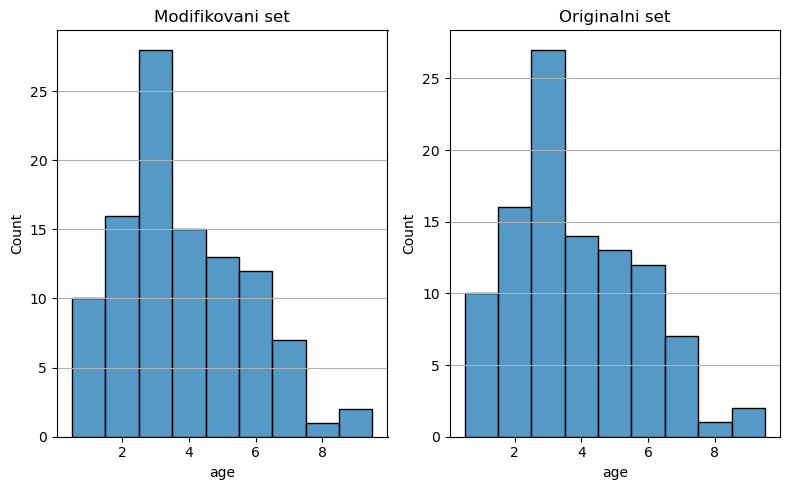

In [33]:

plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.histplot(data = complete_set2, x = 'age', discrete = True)
plt.title('Modifikovani set')
plt.grid(axis = 'y')

plt.subplot(1,2,2)
sns.histplot(data = complete_set, x = 'age', discrete = True)
plt.title('Originalni set')

plt.tight_layout()
plt.grid(axis = 'y')

print(complete_set['age'].value_counts())
print(complete_set2['age'].value_counts())


Grafički se vidi da su vrednosti na y-osi malo suženije.

----------------------------------------

#    3. KLASIFIKACIJA POLA


## 3.1. Logistička regresija


In [34]:
from sklearn.model_selection import train_test_split 

X = complete_set2.drop(['sex_f','sex_m','site'], axis = 1)
y = complete_set2['sex_f']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#complete_set2_scaled = pd.DataFrame(scaler.fit_transform(complete_set2),columns = complete_set2.columns, index=complete_set2.index)

print(X_train_scaled.round().mean())
print(X_train_scaled.round().std()) 


0.017361111111111112
1.0244350200669177


Vidi se da je teorija potvrđena i da *StandardScaler* srednju vrednost namešta na **0**, a standardnu devijaciju na **1**.

Tačnost je:0.65625


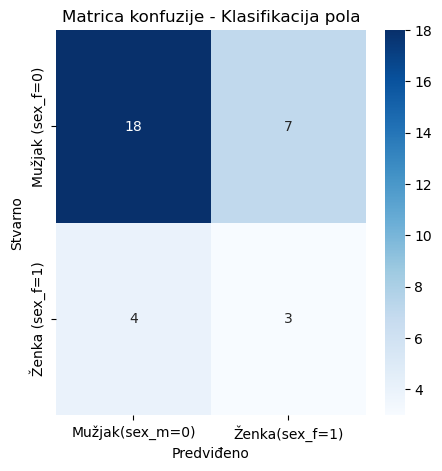

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
predicted = logreg.predict(X_test_scaled)

print(f"Tačnost je:{accuracy_score(y_test, predicted)}")

cmatrix = confusion_matrix(y_test,predicted)

plt.figure(figsize = (5,5))

sns.heatmap(cmatrix, annot = True, fmt='d', cmap = 'Blues', xticklabels=['Mužjak(sex_m=0)','Ženka(sex_f=1)'], yticklabels=['Mužjak (sex_f=0)', 'Ženka (sex_f=1)'])

plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.title('Matrica konfuzije - Klasifikacija pola')

plt.show()


In [36]:
result = pd.DataFrame({"Stvarni":y_test,"Predviđeni":predicted}, index=X_test.index)

indeksF = result[result['Stvarni'] != result['Predviđeni']].index
indeksT = result[result['Stvarni'] == result['Predviđeni']].index
idxF = indeksF[0]
idxT = indeksT[0]

In [37]:
from lime import lime_tabular


explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Mužjak', 'Ženka'],
    mode='classification'
)

pos_u_testu = np.where(X_test.index == idxF)[0][0]

exp = explainer_lime.explain_instance(
    data_row=X_test_scaled[pos_u_testu], 
    predict_fn=logreg.predict_proba
)

exp.show_in_notebook(show_table=True)

In [38]:
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Mužjak', 'Ženka'],
    mode='classification'
)

pos_u_testu = np.where(X_test.index == idxT)[0][0]

exp = explainer_lime.explain_instance(
    data_row=X_test_scaled[pos_u_testu], 
    predict_fn=logreg.predict_proba
)

exp.show_in_notebook(show_table=True)

Poređenjem gornja dva grafika može se suštinski shvatiti problem loše klasifikacije i nemogućnost modela da se izbori sa podacima. Prvi grafik predstavlja pogrešno klasifikovanog mužjaka, skalirane vrednosti svih kolona i pragove u odnosu na koje je model odlučivao da li je mužjak ili ženka u zavisnosti od vrednosti koju je uzorak imao. Drugi grafik predstavlja isto to samo za tačno klasifikovanog mužjaka. Može se primetiti da mužjak u oba slučaja ima totalno drugačije vrednosti karakteristika i samim tim je čak i normalno što ih je model drugačije i video.

----------------------------

*NOTE*: Rezultati prikazani u output ćelijama su rezlutati dobijeni nakon što je izbačena kolona ***site***. Prvobitni rezultati sa kolonom ***site*** su bili sledeći:<br><br>
*"Tačnost je: **0.5** <br>
Da se videti da je algoritam prošao loše, praktično nagađa 50%-50%. Iako je test skup sadržao dominantniji broj mužjaka, algoritam na treningu nije naučio da ih razdvoji od ženki. Od **25** uzoraka mužjaka, čak **11** je klasifikovao kao ženku, dok je od **7** uzoraka ženki, samo **2** tačno klasifikovao.<br>
<br>
Ovo je u neku ruku i bilo očekivano jer podaci ne deluju separabilni, mužjaci i ženke su fizicki poprilično slični jedni drugima.<br>*

<img src="1.jpg" width="400"> <img src="2.jpg" width="400">

*Iz **Feature Importance** grafika se vidi da je na rezultat klasifikacije mužjaka dosta uticala kolona **site**. Zato ću ovu kolonu izbaciti, a ujedno nema ni smisla da se koristi jer je ona kao podgrupa kolone Pop za koju se jasno videlo da joj pripadaju određeni site-ovi".*

-----------

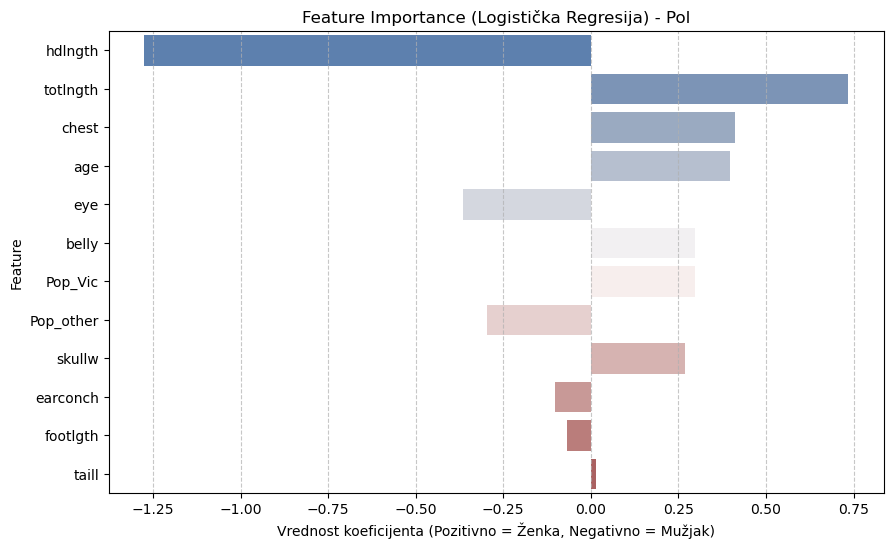

In [39]:
importance = logreg.coef_[0]
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

feature_importance_df['Abs_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='vlag', hue = 'Feature', legend = False)
plt.title('Feature Importance (Logistička Regresija) - Pol')
plt.xlabel('Vrednost koeficijenta (Pozitivno = Ženka, Negativno = Mužjak)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Može se videti da je ideja o izbacivanju kolone ***site*** podigla tačnost za 15%.

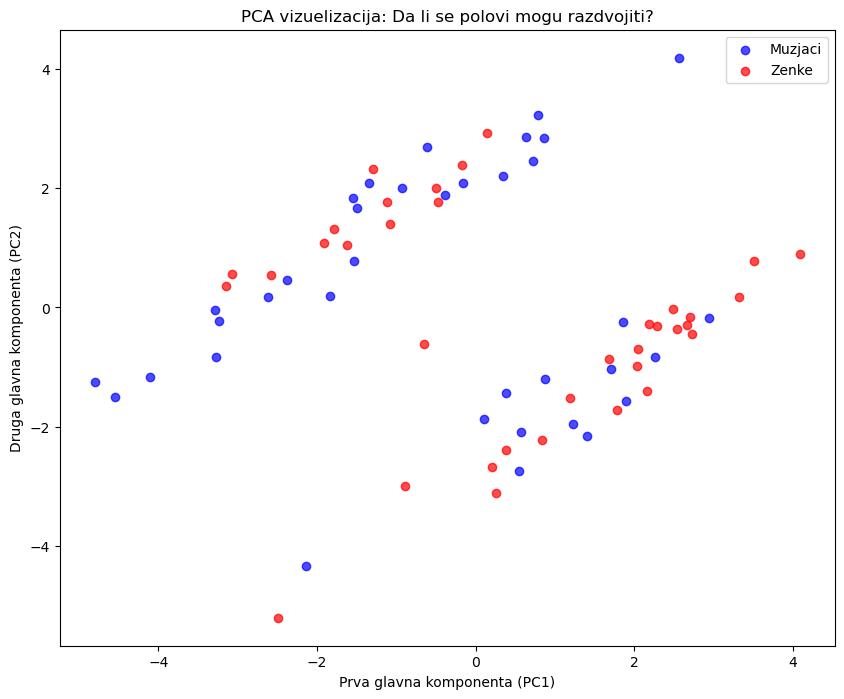

In [40]:
from sklearn.decomposition import PCA

# 1. Inicijalizuj PCA da smanji na 2 dimenzije
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled) # Koristimo skalirane podatke!

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_train==0, 0], X_pca[y_train==0, 1], color='blue', label='Muzjaci', alpha=0.7)
plt.scatter(X_pca[y_train==1, 0], X_pca[y_train==1, 1], color='red', label='Zenke', alpha=0.7)
plt.xlabel('Prva glavna komponenta (PC1)')
plt.ylabel('Druga glavna komponenta (PC2)')
plt.legend()
plt.title('PCA vizuelizacija: Da li se polovi mogu razdvojiti?')
plt.show()

Jasno je zašto logistička regresija ovde ne uspeva: podaci nisu separabilni, zapravo se odvajaju u dva klastera koja sadrže i mužjake i ženke.

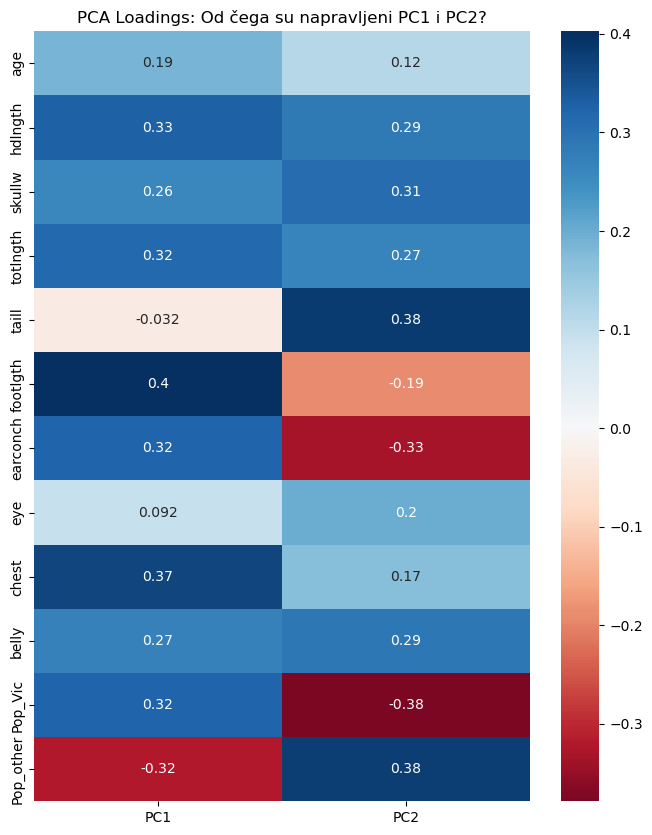

In [41]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X.columns
)

plt.figure(figsize=(8, 10))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0)
plt.title('PCA Loadings: Od čega su napravljeni PC1 i PC2?')
plt.show()

PC1 meri veličinu oposuma, što je krupniji to ima veći PC1 i smešta se na desnoj strani grafika.<br>
PC2 razdvaja populacije po tome da li su iz Victorie ili others i po veličinama ***earconch***, ***tail*** i ***footlgth***.

In [42]:
complete_set.groupby('Pop')[['earconch','taill','footlgth']].mean()

earconch      taill   footlgth
Pop                                   
Vic    52.186957  35.934783  72.397778
other  44.913793  37.862069  65.403448

In [43]:
complete_set.groupby('sex')[['earconch','taill','footlgth']].mean()

earconch      taill   footlgth
sex                                 
f    48.576744  37.104651  69.111905
m    47.816393  36.942623  68.009836

Jasno je da za razliku od pola, oposumi se mogu razdvojiti u zavisnosti od geografske lokacije.

## 3.2. Support Vector Machines


In [44]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf", random_state = 25, gamma = 'scale', C=1, class_weight = 'balanced')
svm.fit(X_train_scaled,y_train)

svm_predicted = svm.predict(X_test_scaled)
print(f"Tacnost je:{accuracy_score(y_test,svm_predicted)}")
#print(f1_score(y_test,svm_predicted))

Tacnost je:0.59375


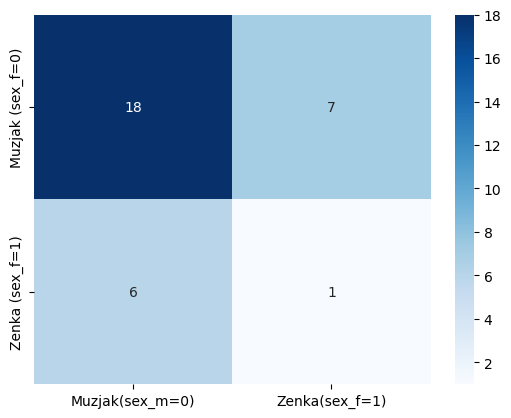

In [45]:
cmatrix = confusion_matrix(y_test,svm_predicted)

sns.heatmap(cmatrix, annot = True, fmt='d', cmap = 'Blues', xticklabels =['Muzjak(sex_m=0)','Zenka(sex_f=1)'], yticklabels=['Muzjak (sex_f=0)', 'Zenka (sex_f=1)'])
plt.show()

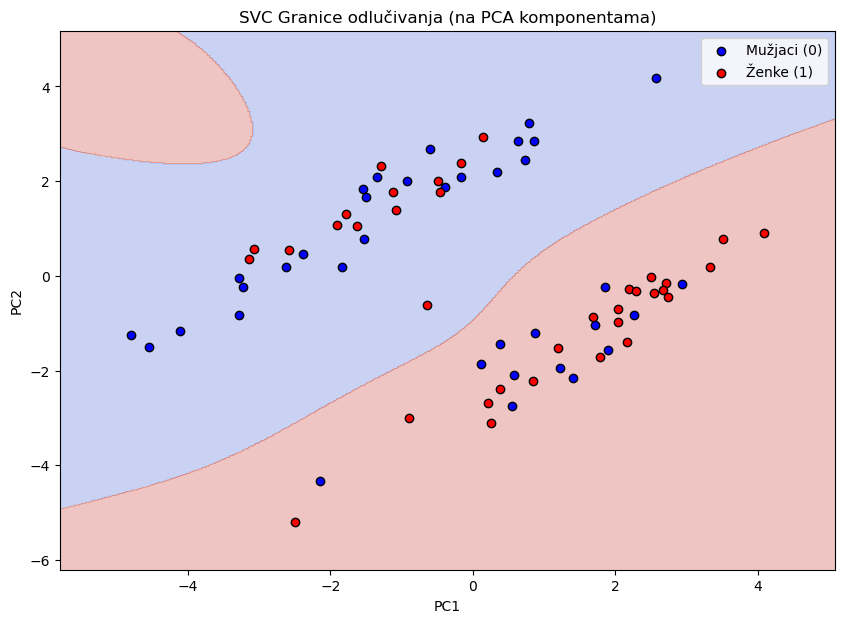

In [46]:
svm_viz = SVC(kernel="rbf", gamma='scale', C=1, class_weight='balanced')
svm_viz.fit(X_pca, y_train)

h = .02 
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 4. Predviđamo vrednosti za svaku tačku u mreži
Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Crtanje
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3) # Boja pozadine (granica)

# Crtamo stvarne tačke
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], c='blue', edgecolors='k', label='Mužjaci (0)')
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], c='red', edgecolors='k', label='Ženke (1)')

plt.title('SVC Granice odlučivanja (na PCA komponentama)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Gore grupisane vrednosti su pridružene Mužjacima, a dole grupisane ženkama.

## 3.3. Zaključak


Vrlo je teško, gotovo nemoguće odrediti pol oposuma na osnovu njegovih fizičkih karakteristika! Možda bi se tačnost povećala izborom drugačijeg *random_state*-a.

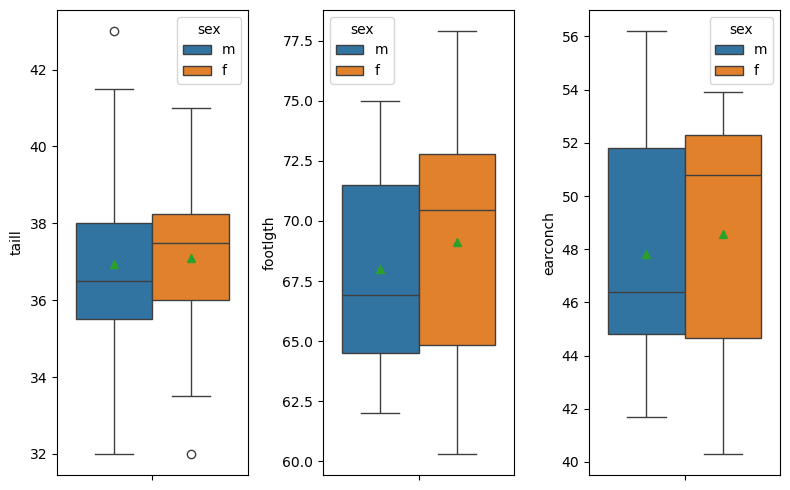

In [47]:
plt.figure(figsize = (8,5))

plt.subplot(1,3,1)
sns.boxplot(data = complete_set, y = 'taill', hue = 'sex', showmeans = True)

plt.subplot(1,3,2)
sns.boxplot(data = complete_set, y = 'footlgth', hue = 'sex', showmeans = True)

plt.subplot(1,3,3)
sns.boxplot(data = complete_set, y = 'earconch', hue = 'sex', showmeans = True)

plt.tight_layout()

----------------------------------------------------

# 4. KLASIFIKACIJA GEOGRAFSKE REGIJE


## 4.1. Pipeline - Logistička regresija i SVM

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = complete_set2.drop(['site','Pop_Vic','Pop_other'], axis = 1)
y = complete_set2['Pop_Vic']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 25) #povecao sam malo test skup

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pipe = Pipeline([('classifier',SVC())]) #SVC() se stavlja proizvoljno jer mora

parameters = [{'classifier':[LogisticRegression(max_iter = 1000, solver = 'liblinear')],
              'classifier__C':[0.1, 1, 10, 50, 100],
              'classifier__penalty':['l1','l2'],
              'classifier__class_weight':[None,'balanced']}, #mora __ zbog GridSearcha
              {'classifier':[SVC()],
              'classifier__C':[0.1, 1, 10, 50, 100],
              'classifier__gamma':['scale', 'auto'],
              'classifier__class_weight':[None,'balanced'],
              'classifier__kernel':['rbf','poly','linear','sigmoid']}
             ]

scores = {'Accuracy':'accuracy',
          'F1_score':'f1',
          'Recall':'recall'}

gscv = GridSearchCV(pipe, parameters,cv =5, scoring = scores, verbose = 2, refit = 'F1_score', n_jobs = -1)

gscv.fit(X_train_scaled,y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', SVC())]), n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            solver='liblinear')],
                          'classifier__C': [0.1, 1, 10, 50, 100],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 1, 10, 50, 100],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__gamma': ['scale', 'auto'],
                          'classifier__kernel': ['rbf', 'poly', 'linear',
                                                 'sigmoid']}],
             refit='F1_score',
             scoring={'Accuracy': 'accuracy', 'F1_score': 'f1',
                      'Recall': 'recall'},
             verbose=2)

In [49]:
print(f"Najbolji parametri (na osnovu F1): {gscv.best_params_}")
print(f"Najbolji F1 rezultat: {gscv.best_score_:.4f}")

results = pd.DataFrame(gscv.cv_results_).sort_values(by = ['rank_test_F1_score'])
#print(results_df[['params', 'mean_test_Accuracy', 'mean_test_F1_Score', 'mean_test_Recall']].sort_values(by='mean_test_F1_Score', ascending=False).head())
results[results['rank_test_F1_score'] == 1][['rank_test_F1_score','rank_test_Accuracy','rank_test_Recall','param_classifier','mean_test_Accuracy','mean_test_F1_score','mean_test_Recall','param_classifier__C','param_classifier__class_weight','param_classifier__penalty']]


Najbolji parametri (na osnovu F1): {'classifier': LogisticRegression(max_iter=1000, solver='liblinear'), 'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l1'}
Najbolji F1 rezultat: 0.9846


rank_test_F1_score  rank_test_Accuracy  rank_test_Recall                                   param_classifier  mean_test_Accuracy  mean_test_F1_score  mean_test_Recall  param_classifier__C param_classifier__class_weight param_classifier__penalty
0                    1                   1                 6  LogisticRegression(max_iter=1000, solver='libl...            0.984615            0.984615          0.971429                  0.1                           None                        l1
37                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                  1.0                           None                       NaN
41                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                  1.0                           None                       NaN
45                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                  1.0                       balanced                       NaN
52                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                           None                       NaN
53                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                           None                       NaN
56                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                           None                       NaN
57                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                           None                       NaN
60                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                       balanced                       NaN
61                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                       balanced                       NaN
64                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                       balanced                       NaN
65                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 10.0                       balanced                       NaN
68                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 50.0                           None                       NaN
69                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 50.0                           None                       NaN
72                   1                   1                 6                                              SVC()            0.984615            0.984615          0.971429                 50.0                           None                       NaN
73                   1              

Kao najbolji model izašla je **Logistička regresija** sa ***C=0.1*** i ***l1*** hiperparametrima, mada tabela pokazuje da postoji i više dobitnih kombinacija. ***l1*** (Lasso) je sam postavio na 0 nebitne karakteristike.

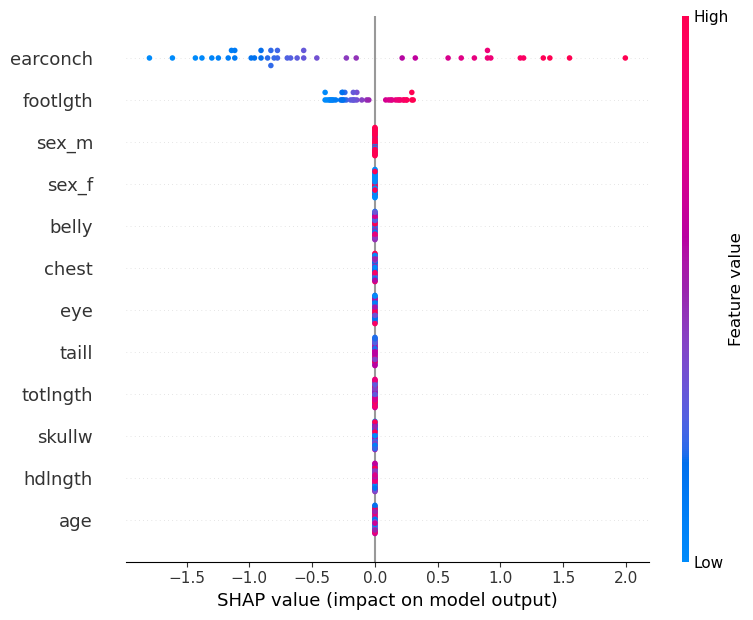

In [50]:

best_logic = gscv.best_estimator_.named_steps['classifier']

explainer = shap.LinearExplainer(best_logic, X_train_scaled, feature_names=X.columns.tolist())
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns.tolist())

Ovim grafikom vidimo da zapravo ona mala razlika koja postoji kod taill vrednosti nije uopšte uzimana u obzir, već je fokus bio samo na earconch i footlght. Crvene tačke, kao što se vidi i na legendi, predstavljaju visoke vrednosti. Kako su one sa desne strane grafika to znači da što oposum ima veću vrednost za karakteristike to je on svojstveniji klasi Victoria. Sa druge strane, plave tačke, koje predstavljaju manje vrednosti, govore da što oposum ima manje vrednosti za karakteristike to je on nije svojstven klasi Victoria, odnosno jeste klasi others.

Tačnost je:1.0


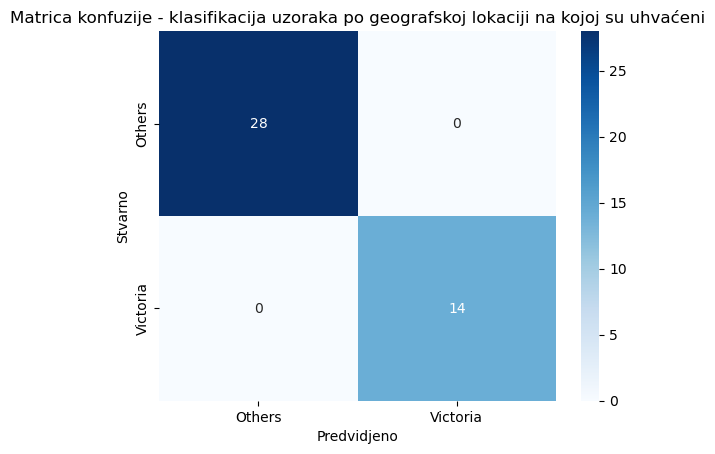

In [51]:
predicted = gscv.predict(X_test_scaled)

cmatrix = confusion_matrix(y_test, predicted)
sns.heatmap(cmatrix, annot=True,fmt='d',cmap='Blues',xticklabels =['Others','Victoria'], yticklabels=['Others', 'Victoria'])
plt.xlabel('Predvidjeno')
plt.ylabel('Stvarno')
plt.title('Matrica konfuzije - klasifikacija uzoraka po geografskoj lokaciji na kojoj su uhvaćeni')
print(f'Tačnost je:{accuracy_score(y_test,predicted)}')

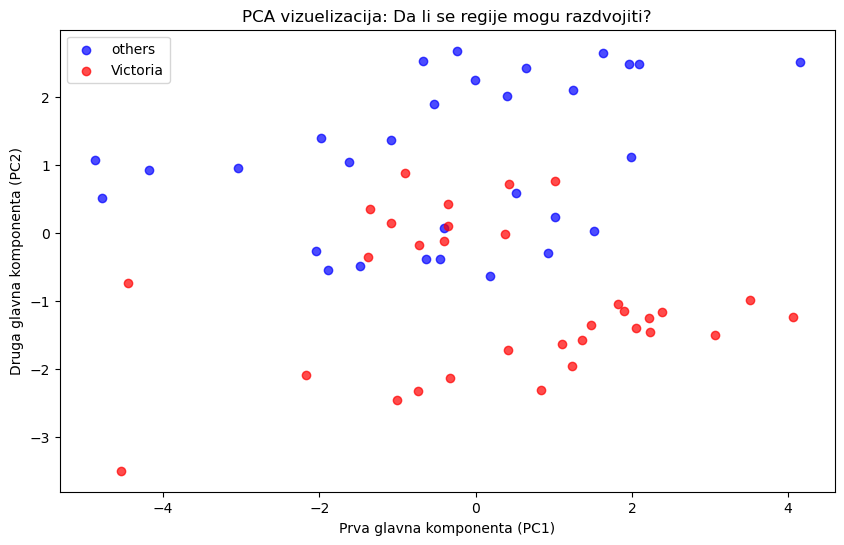

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled) 

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_train==0, 0], X_pca[y_train==0, 1], color='blue', label='others', alpha=0.7)
plt.scatter(X_pca[y_train==1, 0], X_pca[y_train==1, 1], color='red', label='Victoria', alpha=0.7)
plt.xlabel('Prva glavna komponenta (PC1)')
plt.ylabel('Druga glavna komponenta (PC2)')
plt.legend()
plt.title('PCA vizuelizacija: Da li se regije mogu razdvojiti?')
plt.show()

Ovaj grafik izgleda mnogo bolje jer imamo jasno različite grupacije u donjem i gornjem delu grafika. Kako nam PCA daje 2D prikaz svih kolona, vrlo verovatno da kada model to posmatra višedimenzionalno da uspeva da pronađe separaciju između oposuma iz *Victorie* i iz *others*.

## 4.2. Zaključak
Oposumi se mogu razlikovati u fizičkoj građi na osnovu geografskog lokaliteta sa kojeg dolaze.

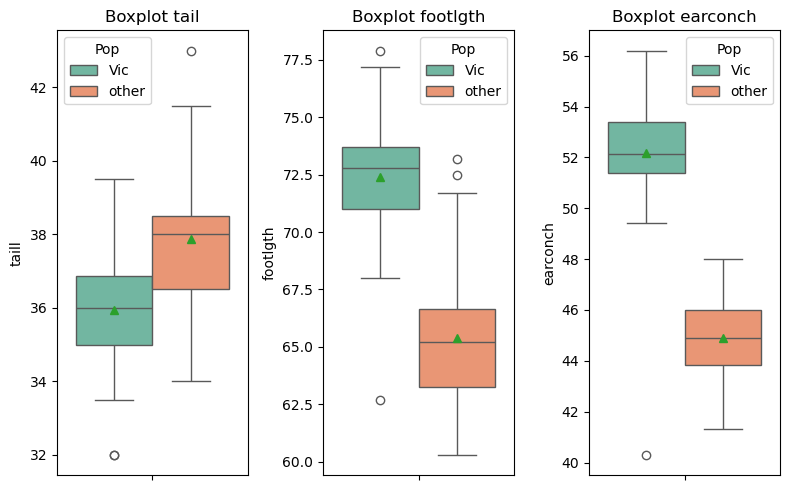

In [53]:
plt.figure(figsize = (8,5))
plt.subplot(1,3,1)
plt.title('Boxplot tail')
sns.boxplot(data = complete_set,y = 'taill', hue = 'Pop', palette = 'Set2', showmeans = True)

plt.subplot(1,3,2)
plt.title('Boxplot footlgth')
sns.boxplot(data = complete_set,y = 'footlgth', hue = 'Pop', palette = 'Set2', showmeans = True)

plt.subplot(1,3,3)
plt.title('Boxplot earconch')
sns.boxplot(data = complete_set,y = 'earconch', hue = 'Pop', palette = 'Set2', showmeans = True)

plt.tight_layout()


Ove tri vrednosti su duzina stopala, duzina usne skoljke i duzina repa (u maloj meri). <br>I grafički je potvrđeno da su vrednosti ovih triju karakteristika distribuirane oko različitih vrednosti u zavisnosti od geografske lokacije (uz autlejere).

---------------------------------------------------------------------------

# 5. PREDVIĐANJE GODINA


## 5.1. Korelacija karakteristika

Text(0.5, 1.0, 'Korelacija karakteristika sa godinama')

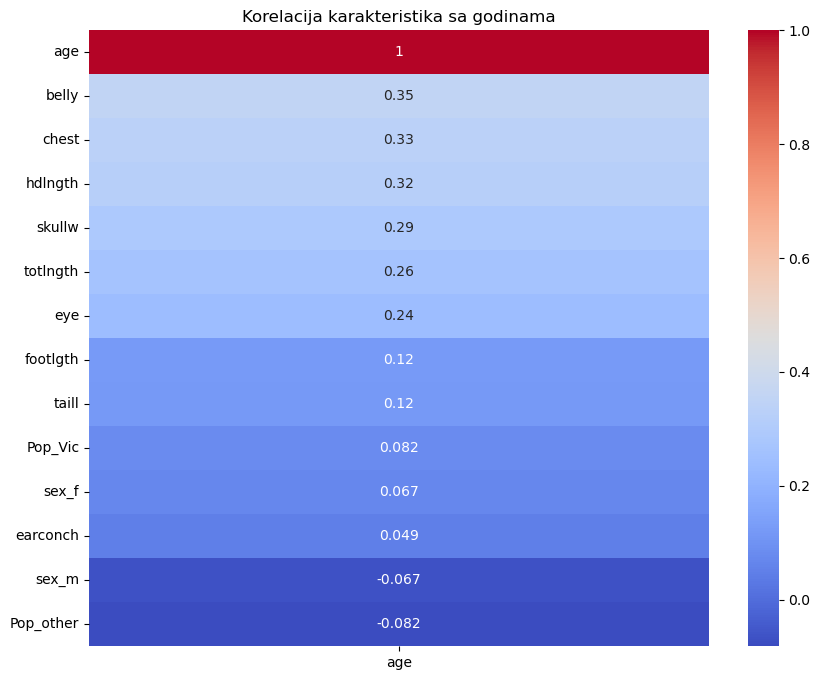

In [54]:

plt.figure(figsize=(10, 8))
sns.heatmap(complete_set2.drop(['site'],axis=1).corr()[['age']].sort_values(by='age', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Korelacija karakteristika sa godinama")


Vidi se da ne postoji ni jedna karakteristika koja bi mogla da ukazuje na visoku korelaciju sa godinama.

Rezultati dobijeni Linearnom Regresijom:<br>
Mean Squared Error: 4.3862745528625<br>
R² Score: -0.2604554707952904

## 5.2. Pipeline - Polinomijalna regresija, Random Forest Regressor i Support Vector Regressor

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression

X = complete_set2.drop(['site','age'], axis = 1)
y = complete_set2['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 25)

pipe = Pipeline([('preprocessor',StandardScaler()),('poly',PolynomialFeatures(degree = 1)),('regressor',LinearRegression())])

algorithms = [{'poly':[None],'regressor':[RandomForestRegressor(random_state = 25)],
               'regressor__n_estimators':[10,100,500],
               'regressor__max_depth':[None, 5, 10]
              },
              {'poly':[PolynomialFeatures()],
               'regressor':[Ridge(max_iter=500)],
               'poly__degree': [1, 2],
               'regressor__alpha': [0.1, 1.0, 10.0]
              },
              {'poly':[None],
               'regressor':[SVR()],
               'regressor__kernel':['rbf','linear'],
               'regressor__C':[0.1, 1, 10, 50, 100],
               'regressor__gamma': ['scale', 'auto']}]

grids = GridSearchCV(pipe, algorithms, cv = 5, verbose = 1, scoring = 'r2', n_jobs = -1)

best_model = grids.fit(X_train,y_train)


Fitting 5 folds for each of 35 candidates, totalling 175 fits


In [56]:
print(best_model.best_estimator_)
print(best_model.best_params_)
print(best_model.best_score_)

Pipeline(steps=[('preprocessor', StandardScaler()), ('poly', None),
                ('regressor', SVR(C=1, gamma='auto'))])
{'poly': None, 'regressor': SVR(), 'regressor__C': 1, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
0.15253626717869193


Rezultat R2 vise nije negativan, ali je idalje veoma nizak, što znači da je i najbolji model dao veoma loš rezultat, odnosno da je godine teško predvideti na osnovu poznatih karakteristika.

## 5.3. Zakljucak
Oposum, nezavisno od pola, je životinja koja očigledno u nekoj starosnoj dobi dostigne određenu fizičku dispoziciju, pa je teško proceniti njen broj godina na osnovu građe.

In [57]:
youngs = complete_set2[(complete_set2['age'] == 1.0) | (complete_set2['age'] == 2.0)]
youngs = youngs.drop(['sex_f','sex_m','Pop_Vic','Pop_other','site'],axis = 1).mean()
youngs_list = youngs.drop('age').tolist()
youngs

age          1.615385
hdlngth     91.192308
skullw      56.019231
totlngth    85.596154
taill       36.500000
footlgth    68.865385
earconch    48.592308
eye         14.642308
chest       26.307692
belly       31.153846
dtype: float64

In [58]:
olds = complete_set2[(complete_set2['age'] != 1.0) & (complete_set2['age'] != 2.0)]
olds = olds.drop(['sex_f','sex_m','Pop_Vic','Pop_other','site'],axis = 1).mean()
olds_list = olds.drop('age').tolist()

olds

age          4.564103
hdlngth     93.073077
skullw      57.171795
totlngth    87.585897
taill       37.179487
footlgth    68.318974
earconch    47.976923
eye         15.180769
chest       27.230769
belly       33.064103
dtype: float64

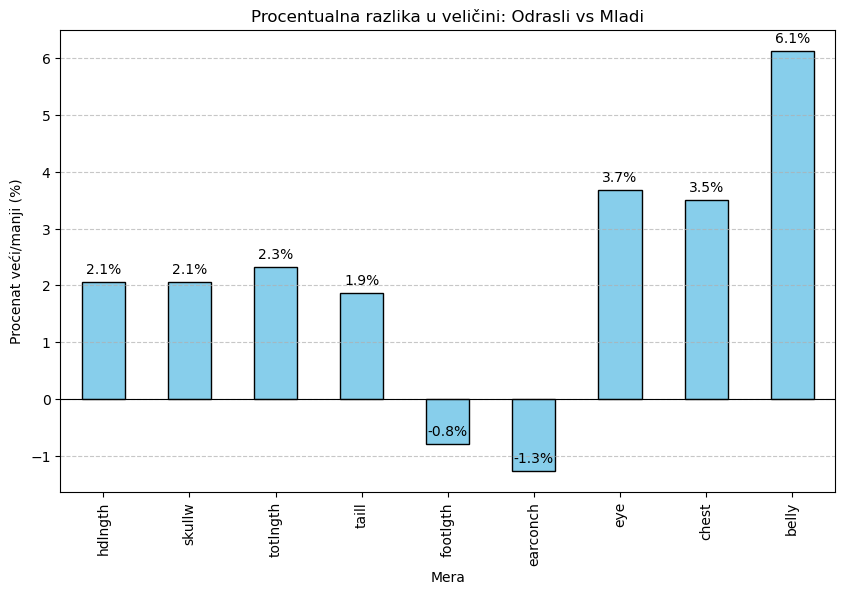

In [59]:
data = {
    'Mera': ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
    'Mladi (1-2 god)': youngs_list,
    'Stari (3+ god)': olds_list
}
df_plot = pd.DataFrame(data).set_index('Mera')

# Računanje procentualne razlike
df_plot['Razlika (%)'] = ((df_plot['Stari (3+ god)'] / df_plot['Mladi (1-2 god)']) - 1) * 100

ax = df_plot['Razlika (%)'].plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Procentualna razlika u veličini: Odrasli vs Mladi')
plt.ylabel('Procenat veći/manji (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

Poređenjem tabela *youngs* i *olds*, kao i posmatranjem grafika procentualne razlike, može se uočiti da su dimenzione razlike između starijih i mlađih oposuma veoma male. Čak postoje i kategorije, poput dužine usne školjke ili dužine stopala koje se očigledno razvijaju u prvim godinama života, a onda kasnije stagniraju. Ove male procentualne razlike su još jedan od razloga lošeg rezultata i nemogućnosti regresionih modela.


# 6. ZAKLJUČAK
Ovo istraživanje je iznelo na uvid mogućnosti i nemogućnosti zaključivanja pojedinih karakteristika životinje Oposum. Pored same deskriptivne analize datog skupa podataka, zaključeno je da se ova vrsta ne razlikuje toliko po polu ili starosnoj dobi koliko po geografskom lokalitetu sa kojeg dolazi. Ovakva osobina je česta za životinje torbare, gde se oni teško vizuelno razlikuju. Trebali bi izvršiti isti test, ali na osnovu merenja unutrašnje kompozicije tela (organa), kako bi videli da li tu postoje parametri po kojima se oposumi mogu razlikovati (npr. Da li mužjaci imaju veću dužinu creva ili obim srca od ženki?).<br>
    Kako su u skupu podataka regije ***South Wales*** i ***Queensland*** grupisane pod nazivom ***other***, trebalo bi pokušati pronaći skup u kome su ove regije predstavljene kao zasebne i videti da li i među njima postoje oposumi različite građe (naročito zato što je ***Queensland*** značajno veća teritorija).<br>
    Ovakva analiza može poslužiti u naučne svrhe, gde bi se naučnici, volonteri ili zapošljeni u institucijama koje se bave prirodom mogli fokusirati na specificirane fizičke elemente (***earconch***, ***taill***, ***footlgth***), fizički razvoj kroz godine, itd.<br>
    Model logističke regresije sa ***L1*** penalizacijom identifikovao je dužinu uva (***earconch***) kao najznačajniji morfološki faktor za razlikovanje populacija. ***SHAP*** analiza pokazuje da jedinke iz Viktorije imaju značajno veće vrednosti ove mere (crvene tačke na desnoj strani grafikona), dok su ostale varijable poput pola i godina starosti imale zanemarljiv uticaj na klasifikaciju regije.<br>
    Još jedan pokušaj koji sam probao kod klasifikacije oposuma po polu jeste uvođenje ***L1*** kazne - ***Lasso***, jer se pokazao kao uspešan pristup kod klasifikacije po regijama. Rezultat je bio povećanje tačnosti na ***0.78***, ali na taj način što je model sve klasifikovao u mužjake koji su ujedno i većina u test skupu - 25 prema 7. Kao da se model brinuo za uspešnost tačnosti, a ne za dobru generalizaciju. ***SHAP*** grafik je pokazao da je ***Lasso*** apsolutno sve karakteristike smestio na nulu, čime je pokazao da model nema osnovu za razlikovanje polova.

![Regije Australije](sv.JPG)